## Glucose Prediction 


This assignment's focus is on predicting blood glucose. There are four parts to the assignment:

   1. Data cleaning
 
   2. Population level model
 
   3. Improving model training
 
   4. Transfer learning
 

## <font color='magenta'>IMPORTANT: READ ME</font> 

This assignment is set up differently from the others. There are four tasks below. You only need to complete ANY two of the four. You do not need to attempt all four and should be able to receive 100\% by attempting and successfully completing two of the four below. 

## Pipeline task overview: Forecasting glucose

Recall from your previous courses that these tasks can typically be described by the following components: 

 1. Data collection - <font color='green'>Done</font>
 2. Data cleaning / transformation - <font color='magenta'>You will do in 2a</font>
 3. Dataset splitting <font color='green'> - Done </font>
 4. Model training <font color='magenta'> - You will do in 2b, 2c and 2d</font>
 5. Model evaluation <font color='magenta'> - You will do in 2b, 2c and 2d</font>
 6. Repeat 1-5 to perform model selection <font color='magenta'> - You will do in 2b, 2c and 2d</font>

## Data cleaning

Continuous glucose monitoring data can be prone to missingness. Users may fail to wear a device for days at a time, resulting in long gaps in the time series. Devices may lose power, or their connection to cloud storage. There are varying approaches for dealing with this missing data. Additionally, these time series can contain outliers which may confuse deep learning models and data cleaning will typically consist of some form of standardization. 

Your goal is to process the raw data frame contained in `.pkl` to put it into the form [X,y] where each row of X is a continuous time series with 24 glucose readings (2 hour readings at 5 min intervals). Each row of y is a continuous time series with 12 glucose readings (the following 1 hour readings at 5 min intervals). 

For each person you will clean their glucose data according to the steps below. For example, assume that the following time series has already been cleaned and transformed and has the following values:
[x1,x2,x3,...,x35,x36,x37] for patient ID i. Then the rows of the generated dataframe for X will be as follows:
- i, x1, x2,...,x24
- i, x2, x3,...,x25

and the corresponding rows of y will be:
- x25,x26,...,x36
- x26,x27,...,x37

The pickle file 'assets/present_day_data.pkl' has glucose level readings for 10 patients with ids 1 through 10. Each patient's record has missing values. You will process each patient's readings according to the following steps.

In [3]:
!pip install -U pandas

## Data processing steps

These steps arise from the following paper ([A Deep Learning Approach for Blood Glucose Prediction
of Type 1 Diabetes](http://ceur-ws.org/Vol-2675/paper23.pdf)). 

1. Save all the blood glucose timestamps
2. Resample the features to a time delta of 1 second
3. Forward fill the missing values by using the last available values
4. Fill the left missing values with 0
5. Resample the features to a time delta of 5 minutes
6. Smooth each feature with a 1D Gaussian filter over a window containing the past 2 hours of data

For each step you will see an incomplete function in data_cleaners.py. Your task in this notebook is to complete each of these functions by following the steps above according to the paper above. 

Once you have completed all of these steps the following tests will pass. 

In [4]:
import data_cleaners as dc

In [5]:
glucose = dc.GlucoseData()

TypeError: Argument 'placement' has incorrect type (expected pandas._libs.internals.BlockPlacement, got slice)

In [ ]:
%load_ext autoreload
%autoreload 2

## <font color='magenta'>Task One</font>

Implement ```step2_preprocessing``` in `data_cleaners.py`

Resample the glucose readings to a time delta of 1 second. 

Before you get started, read the function we’re asking you to complete and make sure you know what it takes as input and what it takes as output. For the first task we’ll help you out and let you know that the input is a Pandas DataFrame and the output is a Pandas DataFrame. You are being asked to transform each series of glucose readings. So if I call new_df = function(old_df), each row of new_df will be the glucose series from old_df resampled to a delta of 1 second. 

For exmaple, results should look like the following (note that number below are correct)

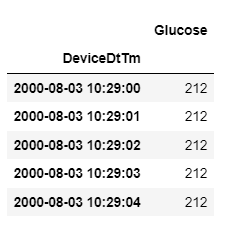

The paper ([A Deep Learning Approach for Blood Glucose Prediction
of Type 1 Diabetes](http://ceur-ws.org/Vol-2675/paper23.pdf)) explains the motivation behind resampling. Before you write any complicated functions make sure you refamiliarize yourself with the Pandas time series library. 



In [5]:
# Add your code in data_cleaners.py. If attempting this task, please set the following flag to True
attempted_task_one = True

In [ ]:
#hidden tests are within this cell

## <font color='magenta'>Task Two</font>

Similar to Task One, you will be completing a function in data_cleaners. Make sure you check what the input and output to this function is.

Implement ```step3_4_preprocessing``` in `data_cleaners.py`

1. Forward fill the missing values by using the last available values - refer to [Pandas fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) method on how to propagate last valid observation.
2. If the first observation was missing, it will stay missing after forward fill. In order to handle this case, simply fill the missing value with 0.

For exmaple, results should look like the following (note that number below are correct)

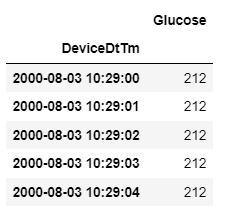

In [ ]:
# Add your code in data_cleaners.py. If attempting this task, please set the following flag to True
attempted_task_two = True
glucose

In [ ]:
#hidden tests are within this cell

## <font color='magenta'>Task Three</font>

Implement `step5_preprocessing` in `data_cleaners.py`

When we did a forward fill in steps 3_4, we imputed the glucose level from the previous value. The glucose levels are currently sampled at 1s interval. Before we resample the glucose levels to a time delta of 5 minutes, we need to ensure that the glucose levels are aligned and no data is lost. In order to do that we perform the following steps:
1. We create a dummy row at 5m interval from the last row's timestamp. The new row will have the same glucose reading as the last row and will have a timestamp of 5 minutes after the last row.
2. Resample the features to a time delta of 5 minutes, ensuring that the timestamps start uniformly at 5, 10,... minutes from the hour using [Pandas resampler first](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.first.html).
3. Finally we shift the rows up by one. 

For exmaple, results should look like the following (note that number below are correct)

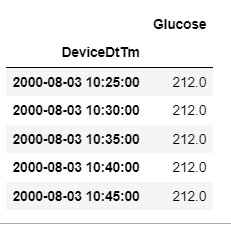

In [ ]:
# Add your code in data_cleaners.py. If attempting this task, please set the following flag to True
attempted_task_three = False

In [ ]:
#hidden tests are within this cell

## <font color='magenta'>Task Four</font>

Implement `step6_preprocessing` in `data_cleaners.py`

Smooth each glucose reading with a 1D Gaussian filter over a window containing the past 2 hours of data (make_loader() has already defined the horizon window for 2 hours).

For exmaple, results should look like the following (note that number below may not be correct)
```python
step_6_output = [256.0, 262.0, ..., 278.0, 274.0]
```



In [ ]:
# Add your code in data_cleaners.py. If attempting this task, please set the following flag to True
attempted_task_four = False

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#hidden tests are within this cell

In [ ]:
# This will generate the population level training data in assets folder
# glucose.generate_training_data()